<a href="https://colab.research.google.com/github/fatimaabuhamdeh/vision/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
!pip install opencv-contrib-python
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2

(0.0, 256.0)

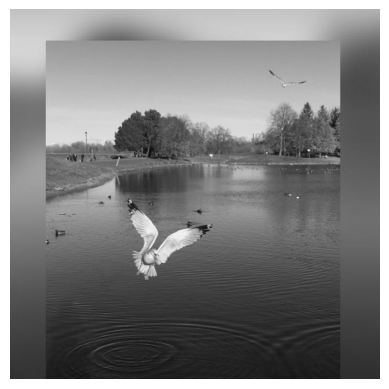

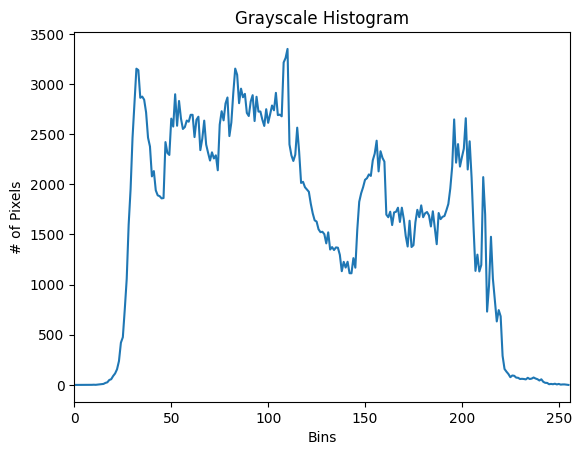

In [ ]:
# load the input image and convert it to grayscale
image = cv.imread("image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# compute a grayscale histogram
hist = cv.calcHist([image], [0], None, [256], [0, 256])
# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(cv.cvtColor(image, cv2.COLOR_GRAY2RGB))
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

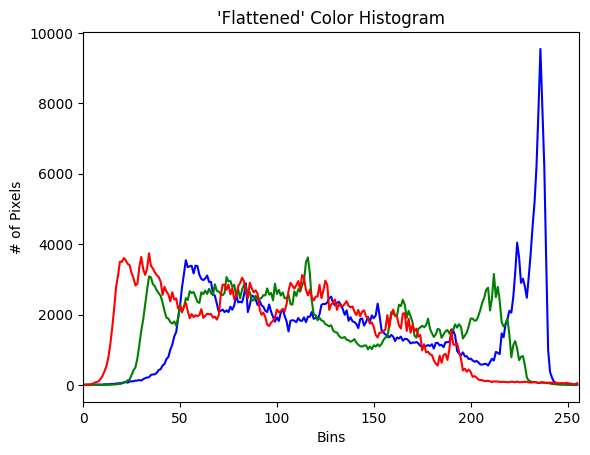

In [ ]:
# load the input image from disk
image = cv.imread("image.jpg")
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

(0.0, 256.0)

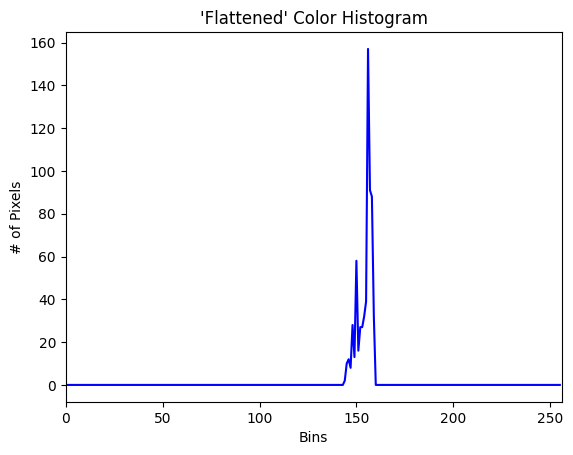

In [ ]:
################## For one color######################
image = cv.imread("image.jpg")
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
# create a histogram for the current channel and plot it
hist = cv.calcHist([chan[0]], [0], None, [256], [0, 256])
plt.plot(hist, color=colors[0])
plt.xlim([0, 256])

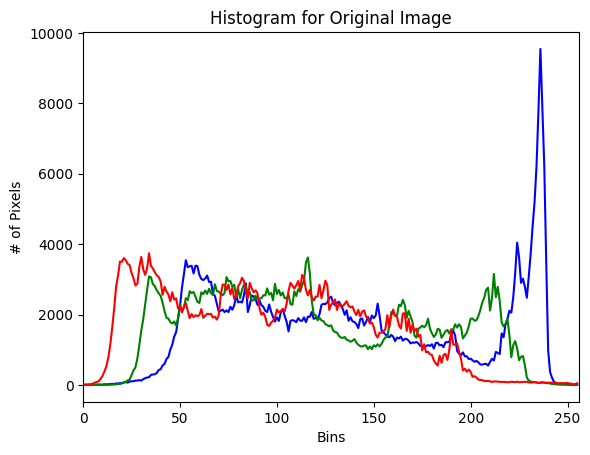

In [ ]:
############### Histogram as a Function ################################
def plot_histogram(image, title, mask=None):
	chans = cv.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

  # load the beach image and plot a histogram for it
image = cv.imread("image.jpg")
plot_histogram(image, "Histogram for Original Image")
#cv2_imshow( image)

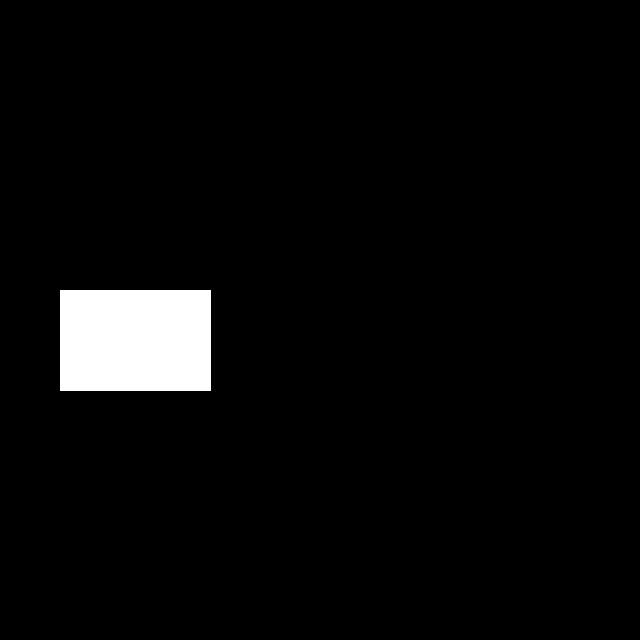

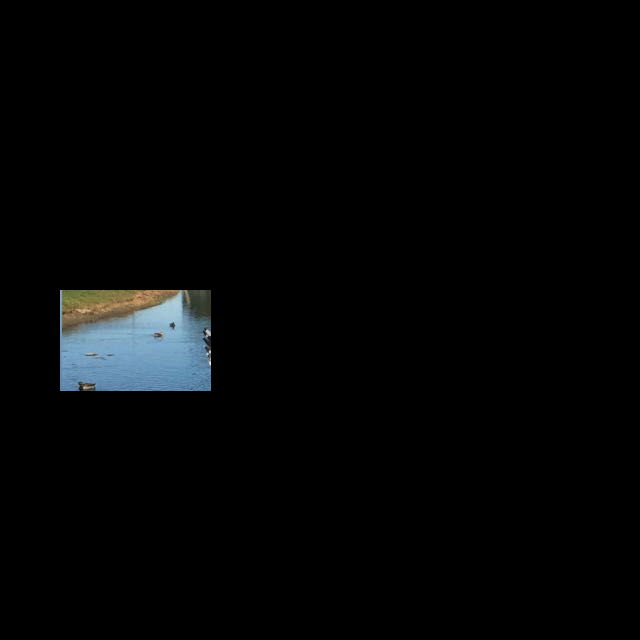

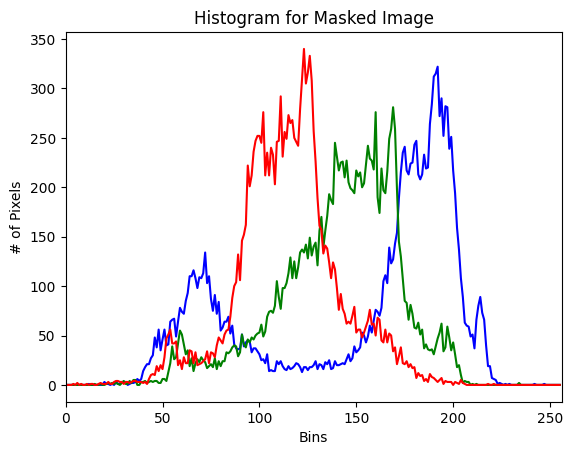

In [ ]:
################ Histogram for the mask ################################
# construct a mask for our image; our mask will be *black* for regions
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
cv2_imshow( mask)
# display the masked region
masked = cv.bitwise_and(image, image, mask=mask)
cv2_imshow( masked)
# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)
# show our plots
plt.show()

performing histogram equalization


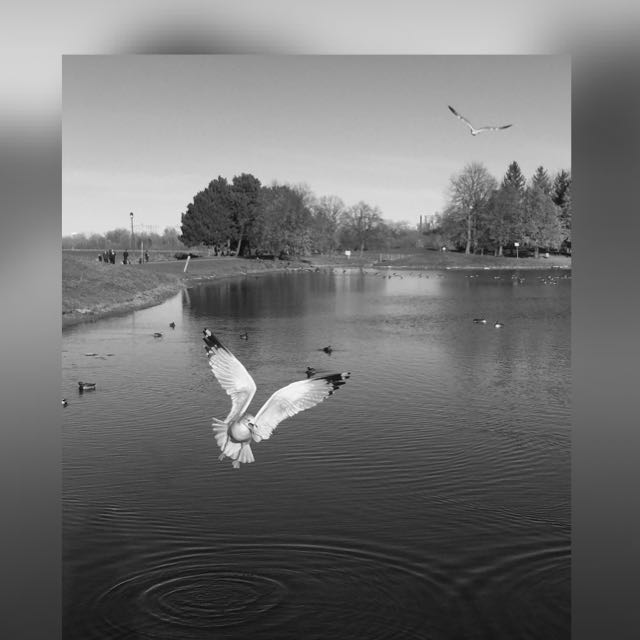

In [ ]:
################# histogram equalization ##################
image = cv.imread("image.jpg")
gray = cv.cvtColor(image, cv2.COLOR_BGR2GRAY)
# apply histogram equalization
print("performing histogram equalization")
equalized = cv.equalizeHist(gray)
cv2_imshow( gray)
